In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.0.0-alpha0
sys.version_info(major=3, minor=7, micro=3, releaselevel='final', serial=0)
matplotlib 3.1.0
numpy 1.16.4
pandas 0.24.2
sklearn 0.21.2
tensorflow 2.0.0-alpha0
tensorflow.python.keras.api._v2.keras 2.2.4-tf


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]
print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

4423680/4422102 [==============================] - 3s 1us/step
(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


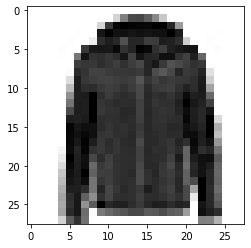

In [3]:
def show_single_image(img_arr):
    plt.imshow(img_arr, cmap="binary")
    plt.show()
show_single_image(x_train[0])

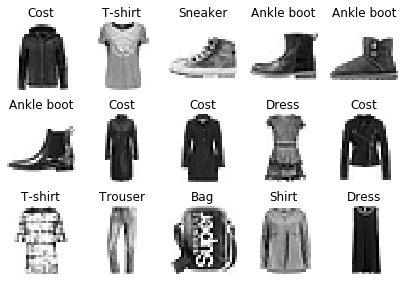

In [4]:
def show_imgs(n_rows, n_cols, x_data, y_data, class_names):
    assert len(x_data) == len(y_data)
    assert n_rows * n_cols < len(x_data)
    plt.figure(figsize = (n_cols * 1.4, n_rows * 1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index+1)
            plt.imshow(x_data[index], cmap = "binary",
                       interpolation = "nearest")
            plt.axis('off')
            plt.title(class_names[y_data[index]])
    plt.show()

class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress',
               'Cost', 'Sandal', 'Shirt', 'Sneaker',
               'Bag', 'Ankle boot']
show_imgs(3, 5, x_train, y_train, class_names)


In [6]:
#tf.keras.models.Sequential()

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28, 28]))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

# relu: y = max(0, x)
# softmax: 将向量变成概率分布. x = [x1, x2, x3]
# y = [e^x1/sum, e^x2/sum, e^x3/sum], sum = e^x1 + e^/x2 + e^/x3

# reason for sparse: y-> index. y->one_hot->[]
model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "sgd",
             metrics = ["accuracy"])

In [7]:
model.layers

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(x_train, y_train, epochs = 10,
                 validation_data = (x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 6s 116us/sample - loss: 1.8980 - accuracy: 0.6861 - val_loss: 0.6413 - val_accuracy: 0.7716
Epoch 2/10
55000/55000 [==============================] - 6s 109us/sample - loss: 0.6061 - accuracy: 0.7859 - val_loss: 0.5605 - val_accuracy: 0.8048
Epoch 3/10
55000/55000 [==============================] - 6s 109us/sample - loss: 0.5207 - accuracy: 0.8165 - val_loss: 0.5159 - val_accuracy: 0.8222
Epoch 4/10
55000/55000 [==============================] - 6s 111us/sample - loss: 0.4795 - accuracy: 0.8292 - val_loss: 0.4793 - val_accuracy: 0.8354
Epoch 5/10
55000/55000 [==============================] - 6s 112us/sample - loss: 0.4487 - accuracy: 0.8382 - val_loss: 0.4952 - val_accuracy: 0.8274
Epoch 6/10
55000/55000 [==============================] - 6s 111us/sample - loss: 0.4280 - accuracy: 0.8462 - val_loss: 0.4679 - val_accuracy: 0.8384
Epoch 7/10
55000/55000 [===========================

In [10]:
type(history)

tensorflow.python.keras.callbacks.History

In [11]:
history.history

{'loss': [1.8979697639378634,
  0.6061017427184365,
  0.5206865276943553,
  0.479543305275657,
  0.4487300020868128,
  0.4280233079129999,
  0.40955824496962806,
  0.3969860306002877,
  0.3841817212191495,
  0.3718493598807942],
 'accuracy': [0.6860909,
  0.7859455,
  0.81650907,
  0.8291818,
  0.8382364,
  0.8461818,
  0.8520182,
  0.85614544,
  0.8612546,
  0.86556363],
 'val_loss': [0.6413441380500794,
  0.5604970675468445,
  0.5159214524030685,
  0.47934774594306945,
  0.4952495698928833,
  0.4679240713596344,
  0.4479784291267395,
  0.44505808691978455,
  0.42458065592050553,
  0.4324817798614502],
 'val_accuracy': [0.7716,
  0.8048,
  0.8222,
  0.8354,
  0.8274,
  0.8384,
  0.8528,
  0.8514,
  0.8558,
  0.8528]}

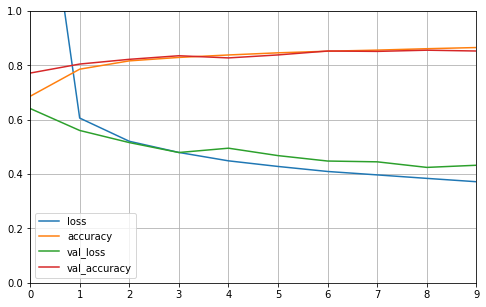

In [14]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize = (8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(history)